# 2.1_Plotting

## *2.1.a Package for scientific computing*

- powerful n-dimensional array object, implemented in C for performance
- various sophisticated array (broadcasting) routines
- near algebra, fourier transform, random sampling etc.

## *2.1.b NumPy arrays and data types*

In [1]:
import numpy as np

In [2]:
# we can create an array from any iterable using np.array
array1 = np.array([1, 2, 3, 4])
array2 = np.array((1, 2.0, 3, 4))

array1, array2, type(array1), type(array2), array1.dtype, array2.dtype

(array([1, 2, 3, 4]),
 array([1., 2., 3., 4.]),
 numpy.ndarray,
 numpy.ndarray,
 dtype('int32'),
 dtype('float64'))

In [3]:
# there are various array creation routines besides from existing iterators (np.emtpy is uninitialized!)
np.ones(2), np.zeros(2), np.full(5, 1.23), np.empty(2), np.arange(3), np.linspace(0., 1., 3), np.ones_like(array1)

(array([1., 1.]),
 array([0., 0.]),
 array([1.23, 1.23, 1.23, 1.23, 1.23]),
 array([1.04888398e-311, 0.00000000e+000]),
 array([0, 1, 2]),
 array([0. , 0.5, 1. ]),
 array([1, 1, 1, 1]))

## *2.1.c NumPy data casting*

In [4]:
# the data type can be changed explicitly to, e.g float64, with
array = np.array([1, 2, 3])
array = array.astype(float)
array, array.dtype

(array([1., 2., 3.]), dtype('float64'))

In [5]:
# string type is also fine
array = array.astype(str)
array, array.dtype

(array(['1.0', '2.0', '3.0'], dtype='<U32'), dtype('<U32'))

## *2.1.d Data type specification during instantiation*

In [6]:
array = np.array([1, 3., 4])
array.dtype

array2 =  np.array([1, 3., 4], dtype=np.int32)
array2.dtype

dtype('int32')

In [7]:
# all array creation routines support specifying the desired data type
array = np.array([1, -2.9, 3, 4], dtype=np.int32) # single precision integer

array, array.dtype  # converting float to int uses the floor

(array([ 1, -2,  3,  4]), dtype('int32'))

In [8]:
np.ones((1,), dtype='float64'), np.ones((1,), dtype='int64'), np.ones((1,), dtype='bool')

(array([1.]), array([1], dtype=int64), array([ True]))

In [9]:
# when applying an operator to two arrays of different types, the resulting array inherits the type of the highest-precision operand

(np.array([1.], dtype='float64') + np.array([1.], dtype='float128')).dtype

TypeError: data type 'float128' not understood

## *2.1.e Operations between NumPy arrays*

In [10]:
array1 = np.arange(5)
array2 = np.full(5, 2.5)
array3 = array1 + array2

(
    array1,
    array2,
    array1 + array2,
    array1 * array2,
    array1 / array2,
    array1 ** array2,
    array1 % array2,
)

(array([0, 1, 2, 3, 4]),
 array([2.5, 2.5, 2.5, 2.5, 2.5]),
 array([2.5, 3.5, 4.5, 5.5, 6.5]),
 array([ 0. ,  2.5,  5. ,  7.5, 10. ]),
 array([0. , 0.4, 0.8, 1.2, 1.6]),
 array([ 0.        ,  1.        ,  5.65685425, 15.58845727, 32.        ]),
 array([0. , 1. , 2. , 0.5, 1.5]))

In [11]:
# array/scalar operations
(
    array1,
    array1 + 1,
    array1 * 2,
    array1 / 2,
    array1 ** 2,
    array1 % 2,
)

(array([0, 1, 2, 3, 4]),
 array([1, 2, 3, 4, 5]),
 array([0, 2, 4, 6, 8]),
 array([0. , 0.5, 1. , 1.5, 2. ]),
 array([ 0,  1,  4,  9, 16]),
 array([0, 1, 0, 1, 0], dtype=int32))

## *2.1.f Indexing and Slicing*

In [12]:
# numpy arrays can be index like lists
# note that assigned values will be automatically converted to their respective dtype
array = np.arange(5)
print(array, '\n')
print(array[3], '\n')
array[3] = 5.5
print(array, '\n')

[0 1 2 3 4] 

3 

[0 1 2 5 4] 



In [13]:
# numpy arrays support the same slicing operations that lists and tuples do
array = np.arange(5)
(array, array[2:], array[1:4], array[1::-2], array[::-1])

(array([0, 1, 2, 3, 4]),
 array([2, 3, 4]),
 array([1, 2, 3]),
 array([1]),
 array([4, 3, 2, 1, 0]))

In [14]:
# numpy arrays also support advanced indexing, which is not supported by lists/tuples (more later)
array = np.arange(2, 12, 2, dtype='float64')
print(array[[0, 1, 0]], '\n')
print(array[range(2, 6, 2)], '\n') # 6 exkludiert
array[[-1, 0]] = -5.
print(array, '\n')

[2. 4. 2.] 

[ 6. 10.] 

[-5.  4.  6.  8. -5.] 



In [15]:
# numpy arrays also support advanced indexing, which is not supported by lists/tuples (more later)
array = np.arange(2, 12, 2)
print(array)
print(array[[0, 1, 0]], '\n')
print(array[range(2, 6, 2)], '\n') # 6 exkludiert
array[[-1, 0]] = -5.
print(array, '\n')

[ 2  4  6  8 10]
[2 4 2] 

[ 6 10] 

[-5  4  6  8 -5] 



## *2.1.g Python vs Numpy*

In [16]:
# the + operator for lists is concatenation, for numpy array it is the element-wise addition
list1 = [1, 2, 3, 4]
list2 = [5, 6, 7, 8]

list1 + list2

[1, 2, 3, 4, 5, 6, 7, 8]

In [17]:
array1 = np.array(list1)
array2 = np.array(list2)

array1 + array2 

array([ 6,  8, 10, 12])

In [18]:
# the * operator is not supported for two list operands and will cause a TypeError
list1 * list2

TypeError: can't multiply sequence by non-int of type 'list'

## *2.1.h Element-wise operations in pure Python*

In [19]:
# we can use list comprehensions with zip for element-wise operations on list
list3 = [x + y for x, y in zip(list1, list2)]

list3, array1 + array2

([6, 8, 10, 12], array([ 6,  8, 10, 12]))

In [20]:
list3 = [x * y for x, y in zip(list1, list2)]      

list3, array1 * array2

([5, 12, 21, 32], array([ 5, 12, 21, 32]))

## *2.1.i Multiple dimensions*

In [21]:
# we can create arrays with arbitrary dimensionality through nested lists, or using creation routines that support specifying a shape
vector = np.array([1, 2])
matrix = np.array([[1, 2], [3, 4]])
tensor = np.array([[[1, 2], [3, 4]], [[5, 6], [7, 8]]])

for array in (vector, matrix, tensor):
    print(f'{array.ndim}-d array with shape: {array.shape}')
    print(array)

1-d array with shape: (2,)
[1 2]
2-d array with shape: (2, 2)
[[1 2]
 [3 4]]
3-d array with shape: (2, 2, 2)
[[[1 2]
  [3 4]]

 [[5 6]
  [7 8]]]


In [22]:
np.ones(2).shape, np.ones((2, 2)).shape, np.ones((2, 2, 2)).shape, np.ones(range(6, 1, -1)).shape

((2,), (2, 2), (2, 2, 2), (6, 5, 4, 3, 2))

In [23]:
# we can instantiate new arrays with added dimension by indexing with None
print(vector[None], vector[None].shape, '\n')

print(vector[:, None], vector[:, None].shape)

[[1 2]] (1, 2) 

[[1]
 [2]] (2, 1)


## *2.1.j Basic Linear Algebra*

In [24]:
# matrix-multiplication can be done with the @ operator for matrices:
array1 = np.ones((4, 3))
array2 = np.ones((3, 2))

print(array1, '\n')
print(array2, '\n')
print((array1 @ array2))

[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]] 

[[1. 1.]
 [1. 1.]
 [1. 1.]] 

[[3. 3.]
 [3. 3.]
 [3. 3.]
 [3. 3.]]


In [25]:
# if using @ with two vectors (1d-arrays), the dot product ist computed
print(np.ones((2,)) @ np.ones((2,)))


2.0


In [26]:
'''
when using @ with a matrix (or >1d array) with a vector (1d-array), 
the results is a matrix-vector product over the second-to-last=VORLETZTE (if vector on left) or 
last=LETZTE (if vector on right) axis

VECTOR LEFT -> VORLETZTE
VECTOR RIGHT -> LETZTE
'''

print(np.ones((2, 3)) @ np.ones((3,))) # (2,3) * (3,) = (2,1)
# print(np.ones((2, 3)).shape, np.ones((3,)).shape ) # shapes -> (2, 3) * (3,) = (2,1)
print("Vector rechts -> LETZTE 3 fällt weg", '\n')

print(np.ones((2,)) @ np.ones((2, 3))) # (2,) * (2,3) = (3,)
# print(np.ones((2,)).shape, np.ones((2,3)).shape ) #shapes -> (2,) * (2,3) = (3,)
print("Vector links -> VORLETZTE ZWEI fällt weg", '\n')

print(np.ones((1, 2, 3)) @ np.ones((3,))) # shapes -> (1, 2, 3) * (3,) = (1, 2)
# print(np.ones((1, 2, 3)).shape, np.ones((3,)).shape) # shapes -> (1, 2, 3) * (3,) = (1, 2)
print("Vector rechts -> LETZTE 3 fällt weg", '\n')

print(np.ones((2,)) @ np.ones((1, 2, 3))) # (1, 2, 3) * (3,) = (1, 3)
# print(np.ones((1, 2, 3)).shape, np.ones((3,)).shape) # shapes -> (1, 2, 3) * (3,) = (1, 3)
print("Vector links -> VORLETZTE 2 fällt weg", '\n')

[3. 3.]
Vector rechts -> LETZTE 3 fällt weg 

[2. 2. 2.]
Vector links -> VORLETZTE ZWEI fällt weg 

[[3. 3.]]
Vector rechts -> LETZTE 3 fällt weg 

[[2. 2. 2.]]
Vector links -> VORLETZTE 2 fällt weg 



In [27]:
'''
when using @ with n-dimensional arrays, the result is a matrix multiplication over the last dimensions. 
Notice how the last axis of the first operand and the second-to-last axis of the second operand vanish
'''
import numpy as np
print((np.ones((4, 5, 3)) @ np.ones((4, 3, 2))).shape) # (4, 5, 2)
print((np.ones((4, 6, 5, 3)) @ np.ones((4, 6, 3, 2))).shape) # (4, 6, 5, 2)
print((np.ones((4, 5, 2)) @ np.ones((4, 2, 3))).shape) # (4, 5, 3)
print((np.ones((4, 6, 3, 2)) @ np.ones((4, 6, 2, 3))).shape) # (4, 6, 3, 3

(4, 5, 2)
(4, 6, 5, 2)
(4, 5, 3)
(4, 6, 3, 3)


In [28]:
# Example
print((np.ones((4, 6, 3, 2)) @ np.ones((4, 6, 2, 3))).shape)

# it means -> take the second last value of first array and the last value of second array -> 3 ,3
# behalte für die vorderen Werte, alle gleichen Werte -> 4, 6
# füge zusammen: 4,6,3,3

(4, 6, 3, 3)


In [29]:
'''
the order of the axes can be reversed with .T 
(only use this for matrices (2d-arrays) when using @, as it acts on the last 2 dimensions)
'''

array = np.ones((2, 3))

print(array @ array.T, '\n')
print(array.T @ array)

[[3. 3.]
 [3. 3.]] 

[[2. 2. 2.]
 [2. 2. 2.]
 [2. 2. 2.]]


In [30]:
a = np.ones((2,3,4))
print(a)
print("_")

b = a.transpose(2,0,1)
print(b.shape)

c = a.T
print(c.shape)

'''
The transpose() function rearranges the dimensions of an array according to the provided order of axes. 
In this case, the order (2, 0, 1) is specified, indicating that the third dimension of a becomes the first dimension, and so on
new dimension is (4,2,3)
'''

[[[1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]]

 [[1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]]]
_
(4, 2, 3)
(4, 3, 2)


'\nThe transpose() function rearranges the dimensions of an array according to the provided order of axes. \nIn this case, the order (2, 0, 1) is specified, indicating that the third dimension of a becomes the first dimension, and so on\nnew dimension is (4,2,3)\n'

## *2.1.k Array reshaping*

In [31]:
# reshaping keeps the order of the elements in memory untouched, but changes the axis layout

array = np.arange(8)

print(array, '\n')

print(array.reshape(2, 4), '\n')

print(array.reshape(2, 2, 2), '\n')

print(array.reshape(4, 2))

[0 1 2 3 4 5 6 7] 

[[0 1 2 3]
 [4 5 6 7]] 

[[[0 1]
  [2 3]]

 [[4 5]
  [6 7]]] 

[[0 1]
 [2 3]
 [4 5]
 [6 7]]


In [32]:
# the size of the array must equal the product of the shape
array.reshape(2, 3)
# --> error message

ValueError: cannot reshape array of size 8 into shape (2,3)

## *2.1.l N-d array indexing*

In [33]:
# We can index specific axes by position to obtain sub-arrays. 
# The elipsis ... fills all previous axis positions.

array = np.arange(12).reshape(2, 2, 3)

array, array[1], array[0, 1], array[..., -1]

(array([[[ 0,  1,  2],
         [ 3,  4,  5]],
 
        [[ 6,  7,  8],
         [ 9, 10, 11]]]),
 array([[ 6,  7,  8],
        [ 9, 10, 11]]),
 array([3, 4, 5]),
 array([[ 2,  5],
        [ 8, 11]]))

In [34]:
print(array[..., -2])
print(array[..., -2])
print(array[..., 1], "\n")

print(array[1, ])
print(array[1, ...])
print(array[-1, ...], "\n")

print(array[1])
print(array[1,1])
print(array[1,1,1])

[[ 1  4]
 [ 7 10]]
[[ 1  4]
 [ 7 10]]
[[ 1  4]
 [ 7 10]] 

[[ 6  7  8]
 [ 9 10 11]]
[[ 6  7  8]
 [ 9 10 11]]
[[ 6  7  8]
 [ 9 10 11]] 

[[ 6  7  8]
 [ 9 10 11]]
[ 9 10 11]
10


In [35]:
#test
array_b = np.arange(12).reshape(2, 2, 3)
print(array_b)
print(array_b[:, -1].shape, "\n") #this deletes one dimension
print("_____")

print(array_b[:, 0])
print(array_b[:, -1])
print(array_b[:, -2])

print("_____")
print(array_b[0,:])
print(array_b[1,:])

[[[ 0  1  2]
  [ 3  4  5]]

 [[ 6  7  8]
  [ 9 10 11]]]
(2, 3) 

_____
[[0 1 2]
 [6 7 8]]
[[ 3  4  5]
 [ 9 10 11]]
[[0 1 2]
 [6 7 8]]
_____
[[0 1 2]
 [3 4 5]]
[[ 6  7  8]
 [ 9 10 11]]


In [36]:
# assignment and slicing are supported
array2 = array.copy()
array2[0] = np.full((2, 3), -1)

array, array2, array[0, ::-1], array[0, :, ::2]

(array([[[ 0,  1,  2],
         [ 3,  4,  5]],
 
        [[ 6,  7,  8],
         [ 9, 10, 11]]]),
 array([[[-1, -1, -1],
         [-1, -1, -1]],
 
        [[ 6,  7,  8],
         [ 9, 10, 11]]]),
 array([[3, 4, 5],
        [0, 1, 2]]),
 array([[0, 2],
        [3, 5]]))

## *2.1.m Transposition*

In [37]:
import numpy as np

In [38]:
# Transposing with .T reverses the order of axes. We can use .transpose to change the order of axes arbitrarily.

# np.arange(24) -> [0 1 ... 22 23] -> shape (24,)
array = np.arange(24).reshape(1, 2, 3, 4)

print(array , "\n")
print(array.shape , "\n")
print(array.T.shape , "\n")
print(array.transpose(3, 0, 2, 1).shape , "\n")

[[[[ 0  1  2  3]
   [ 4  5  6  7]
   [ 8  9 10 11]]

  [[12 13 14 15]
   [16 17 18 19]
   [20 21 22 23]]]] 

(1, 2, 3, 4) 

(4, 3, 2, 1) 

(4, 1, 3, 2) 



In [39]:
# Transposing changes the order the position in memory. 
# .ravel() produces a flat representation of an array.


In [40]:
array = np.arange(6).reshape(2, 3)

array, array.ravel(), array.T, array.T.ravel()

(array([[0, 1, 2],
        [3, 4, 5]]),
 array([0, 1, 2, 3, 4, 5]),
 array([[0, 3],
        [1, 4],
        [2, 5]]),
 array([0, 3, 1, 4, 2, 5]))

## *2.1.n NumPy boolean arrays*

In [41]:
# comparison operators between errors are element-wise and produce boolean arrays
array = np.arange(8) - 3

array, array > 1

(array([-3, -2, -1,  0,  1,  2,  3,  4]),
 array([False, False, False, False, False,  True,  True,  True]))

In [42]:
# for boolean arrays, "+" and "|" are the logical "or" operation
# "*" and "&" are the logical "and"
# "~" is the logical "not"

mask1 = array < -1
mask2 = array > 1

print(mask1, mask2, '\n', sep='\n')
print(mask1 | mask2)
print(mask1 & mask2)
print(~mask1)

[ True  True False False False False False False]
[False False False False False  True  True  True]


[ True  True False False False  True  True  True]
[False False False False False False False False]
[False False  True  True  True  True  True  True]


In [43]:
# arrays may be indexed with boolean arrays of the same size to obtain a flat list of elements
array[array > 1], array[array < -1]

(array([2, 3, 4]), array([-3, -2]))

## *2.1.o NumPy boolean function*

In [44]:
# np.all and np.any can be used to check whether all or any of the elements are True
print(array)
print(np.all(array < 1))
print(np.any(array < 1))

[-3 -2 -1  0  1  2  3  4]
False
True


In [45]:
# the array methods .all and .any are useful aliases
(array > 3).any(), ((array > -3) & (array < 5)).all()

(True, False)

## *2.1.p NumPy boolean functions applied along axis*

In [46]:
# First let's construct a matrix from array
print(a)

[[[1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]]

 [[1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]]]


In [47]:
a = np.ones((2,3,4))
A = a.reshape(-1, 4) # second axis must have 4 elements, the others detrimined automatically
print(A, A.shape)

[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]] (6, 4)


In [48]:
# specify 'collapsing' axis
ans = np.all(A > -2, axis=1) #are all elements greather than -2 column-wise
print(ans, ans.shape)

[ True  True  True  True  True  True] (6,)


In [49]:
ans = np.all(A > 0, axis=1, keepdims=True) # are all elements positive row-wise (keppdims prevents shape squeezing)
ans, ans.shape

(array([[ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True]]),
 (6, 1))

## *2.1.q Axis-reducing functions*

In [50]:
# like with np.all, and np.any, we can reduce an array to a scalar using the sum, mean, standard deviation, variance etc.

array = np.arange(24, dtype=float)

print(np.sum(array), np.mean(array), np.std(array), np.var(array))
print(array.sum(), array.mean(), array.std(), array.var())

276.0 11.5 6.922186552431729 47.916666666666664
276.0 11.5 6.922186552431729 47.916666666666664


In [51]:
# all these functions support the reduction over a specific axis, or a set of axes
array = np.arange(24).reshape(2, 3, 4)

array, array.sum(axis=1), array.sum(0), array.sum((0, 2)), np.all(array > 15, axis=2)

# print(array,array.sum(axis=0))

(array([[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11]],
 
        [[12, 13, 14, 15],
         [16, 17, 18, 19],
         [20, 21, 22, 23]]]),
 array([[12, 15, 18, 21],
        [48, 51, 54, 57]]),
 array([[12, 14, 16, 18],
        [20, 22, 24, 26],
        [28, 30, 32, 34]]),
 array([ 60,  92, 124]),
 array([[False, False, False],
        [False,  True,  True]]))

In [52]:
# the keepdims keyword argument makes sure the reduced dimension is set to 1 rather than being removed
array.shape, array.sum(1).shape, array.sum(1, keepdims=True).shape

((2, 3, 4), (2, 4), (2, 1, 4))

## *2.1.r Broadcoasting*

In [53]:
'''
(4,3) + (4,3) = (4,3)
(4,3) + (1,3) = (4,3)
(4,1) + (1,3) = (4,3)
'''

'\n(4,3) + (4,3) = (4,3)\n(4,3) + (1,3) = (4,3)\n(4,1) + (1,3) = (4,3)\n'

## *2.1.s Explizit Broadcoasting*

In [54]:
array1 = np.arange(4)
array2 = np.arange(3, -1, -1)

print(array1.shape, array1)
print(array2.shape, array2)

(4,) [0 1 2 3]
(4,) [3 2 1 0]


In [55]:
# we can repeat elements of an array, to e.g. compute the pairwise differences of 2 arrays
# For this, we first add 2 new dimensions with the None indexing

print(array1[None].shape, array1[None]) # same as print(array2[None, :].shape, array2[None, :])
print(array2[:, None].shape, array2[:, None])

(1, 4) [[0 1 2 3]]
(4, 1) [[3]
 [2]
 [1]
 [0]]


In [56]:
# then, we can repeat all elements of a specific axis using np.repeat
array3 = np.repeat(array1[None], 5, 0)
array4 = np.repeat(array2[:, None], 6, 1)

print(array3.shape, array3, "\n")
print(array4.shape, array4)

(5, 4) [[0 1 2 3]
 [0 1 2 3]
 [0 1 2 3]
 [0 1 2 3]
 [0 1 2 3]] 

(4, 6) [[3 3 3 3 3 3]
 [2 2 2 2 2 2]
 [1 1 1 1 1 1]
 [0 0 0 0 0 0]]


## *2.1.t Implicit broadcasting*

In [57]:
'''
in numpy, if the an axis of an operand is "1" for one array, 
and the same axis has another value larger than 1 for another, 
the operation will be broadcasted to the size of the larger axis
'''
print(array1.shape, array1[None].shape)
print(array2.shape, array2[:, None].shape, "\n")

print(array1[None] - array2[None]) # same as (array1 - array2)
print("_")
print(array1[None] - array2[:, None])

(4,) (1, 4)
(4,) (4, 1) 

[[-3 -1  1  3]]
_
[[-3 -2 -1  0]
 [-2 -1  0  1]
 [-1  0  1  2]
 [ 0  1  2  3]]


In [58]:
# this is possible with any amount of axes
array = np.arange(4)

print(array, "\n")

print(array[None, None, None].shape)
print(array[None, None, :, None].shape)
print(array[None, :, None, None].shape)
print(array[:, None, None, None].shape)

print("_________")
(
    array[None, None, None]
    + array[None, None, :, None]
    + array[None, :, None, None]
    + array[:, None, None, None]
).shape

[0 1 2 3] 

(1, 1, 1, 4)
(1, 1, 4, 1)
(1, 4, 1, 1)
(4, 1, 1, 1)
_________


(4, 4, 4, 4)

In [59]:
# be aware that one of the axes must be 1 for this to work
np.ones((2, 3)) + np.ones((4, 3))

ValueError: operands could not be broadcast together with shapes (2,3) (4,3) 

## *2.1.u Python vs. NumPy performance evaluation*

In [60]:
# Pure Python implementation
from time import time
import numpy as np

def benchmark_py(n):
    """
    # code
    """
    st = time()
    Z = dot_(X, Y, Z)
    time_in_s = time() - st
    
    return time_in_s

In [61]:
comp_time_py = benchmark_py(128)
comp_time_py

NameError: name 'dot_' is not defined

In [62]:
# Numpy implementation
def benchmark_np(n):
    st = time()
    Z  = dot_(X, Y, Z)
    time_in_s = time() - st
     
    return time_in_s

In [63]:
comp_time_np = benchmark_np(128)
comp_time_np

NameError: name 'dot_' is not defined

In [64]:
ratio = comp_time_py/comp_time_np
f'NumPy is {ratio:0.0f} times faster then pure Python'

NameError: name 'comp_time_py' is not defined

## *2.1.v Scientific plotting with matplotlib*

In [65]:
import matplotlib.pyplot as plt

In [66]:
# Create Input Data
import numpy as np

x = np.arange(0, 4 * np.pi, 0.25) # similar to range function from pure Python

# elementwise sinus and cosinus functions
y = np.sin(x) 
z = np.cos(x)

## *2.1.w Basic plot*

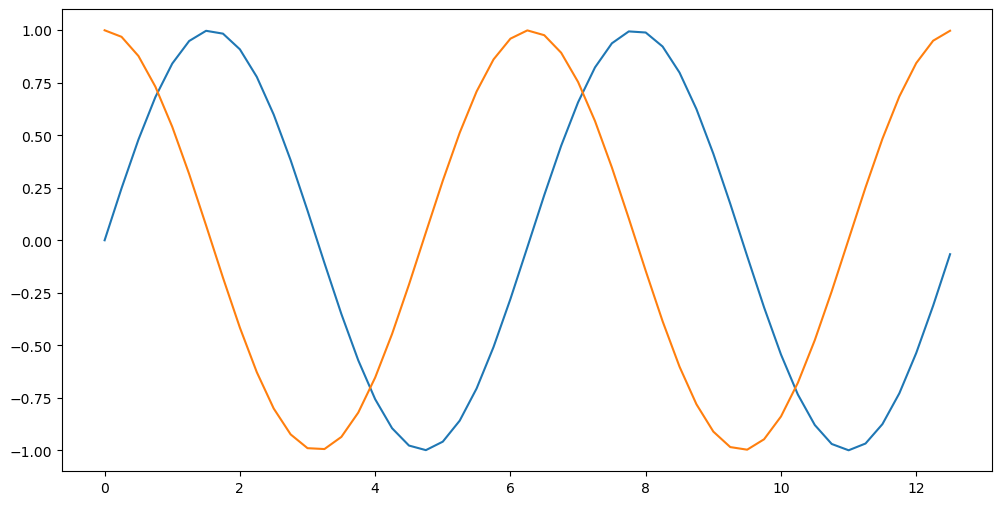

In [67]:
# figure proportions (sizes)
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(x, y)
ax.plot(x, z);

## *2.1.v Markers, Labels and Title*

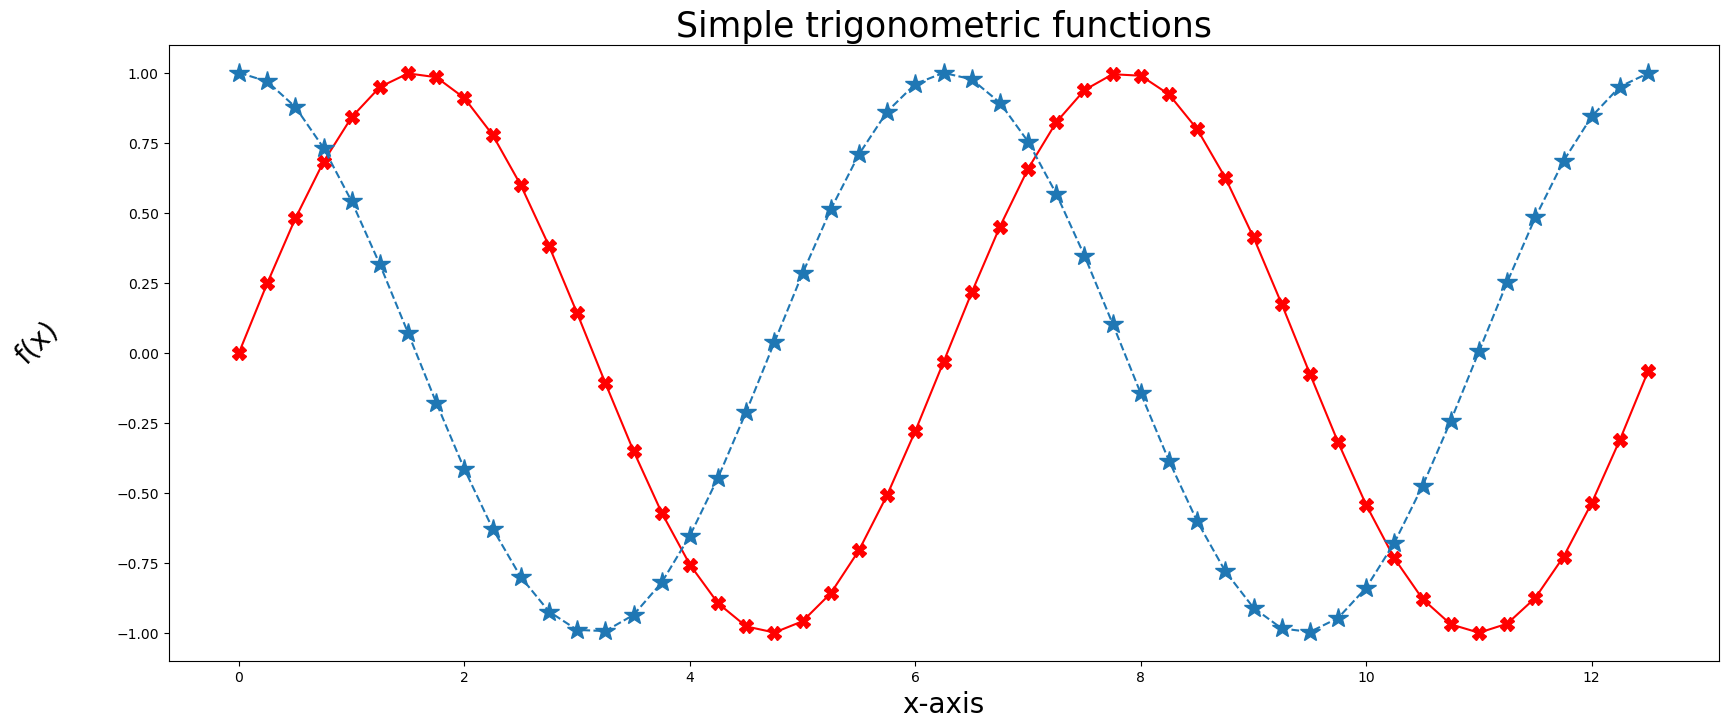

In [68]:
fig, ax = plt.subplots(figsize=(20, 8))

# connected circles marker style
ax.plot(x, y, 'X-', color='red', ms=10) # marker shortcut (o-) connected circles + color

# connected stars   
ax.plot(x, z, '*--', ms=15)  # (*--) stars with dashed line connection + size of the markers

# Setting the labels of axis
ax.set_xlabel('x-axis', fontsize=20) # x-axis label + fontsize
ax.set_ylabel('f(x)', fontsize=20, rotation=45, labelpad=50) # y-axis label + rotation angle (default 90 degree)
# labelpad: Spacing in points from the axes bounding box including ticks and tick labels.

ax.set_title('Simple trigonometric functions', fontsize=25); #; skips printing the plot object representationa

## *2.1.w Legend, Ticks and Grids*

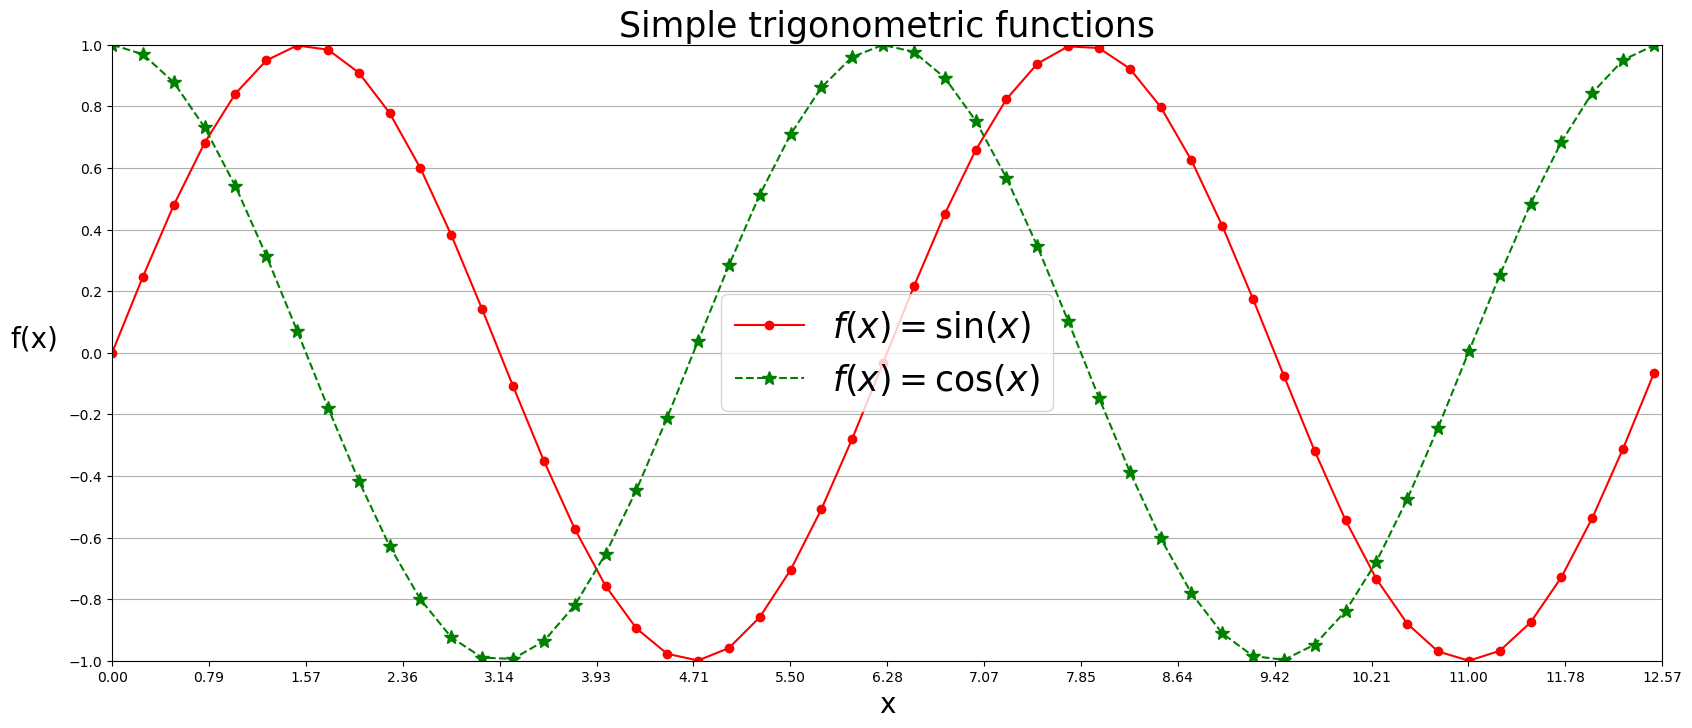

In [69]:
# figure proportions (sizes)
fig, ax = plt.subplots(figsize=(20, 8))

# connected circles marker style
ax.plot(x, y, 'o-', color='red', label='$f(x) = \sin(x)$') # LaTex expressions for the line labeling

# connected stars 
ax.plot(x, z, '*--', color='green', label='$f(x) = \cos(x)$', ms=10) 

ax.set_ylim(-1,1) # sets axis limits
ax.set_xlim(0, 4*np.pi)

ax.legend(loc='best', fontsize=25) # trigger the legend creation with the specified location + fontsize

ax.set_xlabel('x', fontsize=20) # fontsize
ax.set_ylabel('f(x)', fontsize=20, rotation=0, labelpad=25) # lable rotation angle (default 90 degree)

ax.set_yticks(np.arange(-1, 1.01, .2) ) # from -1 to 1 every 0.2 is a tick
ax.set_xticks(np.arange(0, 4*np.pi + 0.01, np.pi/4)) # from 0 to 4 pi every pi/4 is a tick

ax.set_title('Simple trigonometric functions', fontsize=25)
ax.grid(axis='y') # grid lines

## *2.1.x Performance curves for matrix multiplication*

NameError: name 'sizes' is not defined

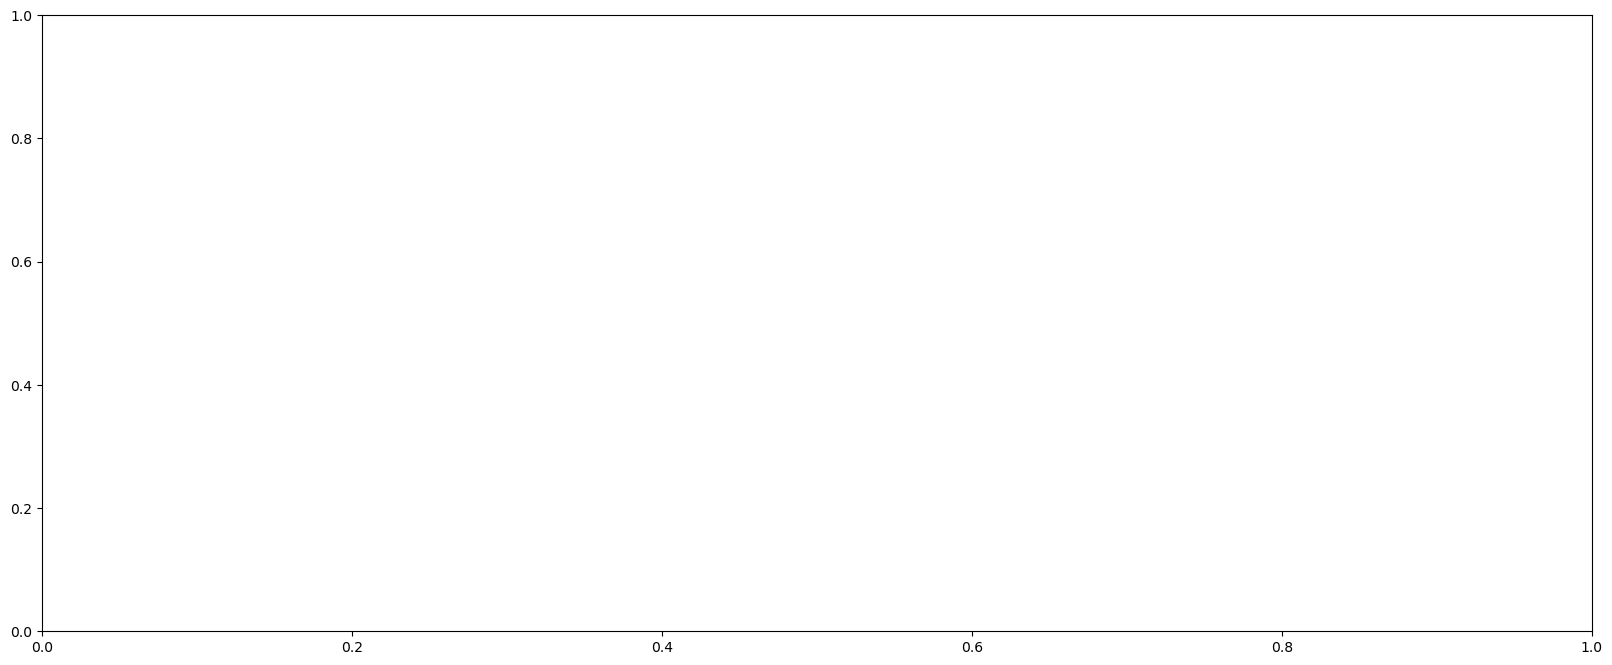

In [70]:
# just to know -> not plotting

fig, ax = plt.subplots(figsize=(20, 8))

ax.plot(sizes, py_t, 'o-', label='Python', color='red', alpha=0.7) # alpha for the transparency value
ax.plot(sizes, np_t, 's-', label='NumPy', color='g') # instead color ='green' use a shortcut 'g'

# change the scale of the axis
#ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlabel('shape on of an array (n,n)', fontsize=18)
ax.set_ylabel('time [s]', fontsize=15)
ax.set_title('Python vs. NumPy performance', fontsize=20)

ax.grid(axis='y') # grid with along an y axis
ax.legend(loc='upper left', fontsize=15);